## Retrieve the data from Kaggle:
Fetch the data from Kaggle and save to a Cookiecutter project

In [ ]:
# Using Cookiecutter, run in Gitbash
# In Users/jaylward/
# cookiecutter https://github.com/drivendata/cookiecutter-data-science

#This create project called titanic
#Add Kaggle credentials to .env file

#From anaconda prompt, launch "jupyter notebook" from within the titanic project folder

In [45]:
#Create an executable .py script that will pull the data in a reproducible manner
get_raw_data_script_file = os.path.join(os.path.pardir,'src','data','getrawdata.py')

In [46]:
#Use Jupyter magic function to write to a .py file
%%writefile $get_raw_data_script_file

#Download Kaggle data using the Kaggle API, Pluralsight method no longer seems to work
#https://technowhisp.com/kaggle-api-python-documentation/
#You need to first create an API key within your Kaggle account section and save in C:\users\username\.kaggle\kaggle.json

import logging

log_fmt = '%(asctime)s - %(names)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format = log_fmt)

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

# Download single file for a competition
# Signature: competition_download_file(competition, file_name, path=None, force=False, quiet=False)
api.competition_download_file('titanic','train.csv', path = r'C:\Users\jaylward\titanic\data\raw')
api.competition_download_file('titanic','test.csv', path = r'C:\Users\jaylward\titanic\data\raw')

#kaggle.api.dataset_download_files('train.cvs', path='https://www.kaggle.com/c/titanic/download/', unzip=True)

Writing ..\src\data\getrawdata.py


In [47]:
#Execute the .py file from Jupyter
!python $get_raw_data_script_file

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


## EDA - Titanic Dataset:

In [48]:
import pandas as pd
import numpy as np
import os

In [51]:
#Create OS agnostic file paths for datasets
raw_data_path = os.path.join(os.path.pardir,'data','raw')
train_file_path = os.path.join(raw_data_path,'train.csv')
test_file_path = os.path.join(raw_data_path,'test.csv')

'..\\data\\raw\\test.csv'

In [55]:
#Read in the data
train_df = pd.read_csv(train_file_path, index_col = 'PassengerId')
test_df = pd.read_csv(test_file_path, index_col = 'PassengerId')

In [68]:
print(train_df.info(), test_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35

In [69]:
#Set default value for test dataset Survived

test_df["Survived"] = -888

In [74]:
#We can now concatenate test and train DFs and prep data across both DFs
#Sort the columns to account for Survived existing at different col index numbers

df = pd.concat((train_df,test_df), axis = 0, sort = True)


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [76]:
df.head()

Age Cabin Embarked     Fare  \
PassengerId                                 
1            22.0   NaN        S   7.2500   
2            38.0   C85        C  71.2833   
3            26.0   NaN        S   7.9250   
4            35.0  C123        S  53.1000   
5            35.0   NaN        S   8.0500   

                                                          Name  Parch  Pclass  \
PassengerId                                                                     
1                                      Braund, Mr. Owen Harris      0       3   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...      0       1   
3                                       Heikkinen, Miss. Laina      0       3   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)      0       1   
5                                     Allen, Mr. William Henry      0       3   

                Sex  SibSp  Survived            Ticket  
PassengerId                                             
1              male      1         0         A/5 21171  
2            female      1         1          PC 17599  
3            female      0         1  STON/O2. 3101282  
4            female      1         1            113803  
5              male      0         0            373450

In [77]:
df.tail()

Age Cabin Embarked      Fare                          Name  \
PassengerId                                                                
1305          NaN   NaN        S    8.0500            Spector, Mr. Woolf   
1306         39.0  C105        C  108.9000  Oliva y Ocana, Dona. Fermina   
1307         38.5   NaN        S    7.2500  Saether, Mr. Simon Sivertsen   
1308          NaN   NaN        S    8.0500           Ware, Mr. Frederick   
1309          NaN   NaN        C   22.3583      Peter, Master. Michael J   

             Parch  Pclass     Sex  SibSp  Survived              Ticket  
PassengerId                                                              
1305             0       3    male      0      -888           A.5. 3236  
1306             0       1  female      0      -888            PC 17758  
1307             0       3    male      0      -888  SOTON/O.Q. 3101262  
1308             0       3    male      0      -888              359309  
1309             1       3    male      1      -888                2668

### Extended EDA with Pandas

In [86]:
#Select a column by name:

#1 Using the "dot" function to access object property
df.Name.head()

#2 Using brackets
df['Name'].head()

#With a list of columns
df[['Name', 'Age']].head()

Name   Age
PassengerId                                                         
1                                      Braund, Mr. Owen Harris  22.0
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
3                                       Heikkinen, Miss. Laina  26.0
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
5                                     Allen, Mr. William Henry  35.0

In [89]:
#Selecting rows

#1 Using loc for label based indexing

# start_row_index_val:end_row_index_val,start_col:end_col
df.loc[5:10,]

Age Cabin Embarked     Fare  \
PassengerId                                 
5            35.0   NaN        S   8.0500   
6             NaN   NaN        Q   8.4583   
7            54.0   E46        S  51.8625   
8             2.0   NaN        S  21.0750   
9            27.0   NaN        S  11.1333   
10           14.0   NaN        C  30.0708   

                                                          Name  Parch  Pclass  \
PassengerId                                                                     
5                                     Allen, Mr. William Henry      0       3   
6                                             Moran, Mr. James      0       3   
7                                      McCarthy, Mr. Timothy J      0       1   
8                               Palsson, Master. Gosta Leonard      1       3   
9            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      2       3   
10                         Nasser, Mrs. Nicholas (Adele Achem)      0       2   

                Sex  SibSp  Survived  Ticket  
PassengerId                                   
5              male      0         0  373450  
6              male      0         0  330877  
7              male      0         0   17463  
8              male      3         0  349909  
9            female      0         1  347742  
10           female      1         1  237736

In [90]:
#Selecting row and col range using loc

df.loc[5:10,'Age':'Sex']

Age Cabin Embarked     Fare  \
PassengerId                                 
5            35.0   NaN        S   8.0500   
6             NaN   NaN        Q   8.4583   
7            54.0   E46        S  51.8625   
8             2.0   NaN        S  21.0750   
9            27.0   NaN        S  11.1333   
10           14.0   NaN        C  30.0708   

                                                          Name  Parch  Pclass  \
PassengerId                                                                     
5                                     Allen, Mr. William Henry      0       3   
6                                             Moran, Mr. James      0       3   
7                                      McCarthy, Mr. Timothy J      0       1   
8                               Palsson, Master. Gosta Leonard      1       3   
9            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      2       3   
10                         Nasser, Mrs. Nicholas (Adele Achem)      0       2   

                Sex  
PassengerId          
5              male  
6              male  
7              male  
8              male  
9            female  
10           female

In [91]:
#Or select specific columns rather than continuous range:

df.loc[5:10,['Age','Fare','Sex']]

Age     Fare     Sex
PassengerId                       
5            35.0   8.0500    male
6             NaN   8.4583    male
7            54.0  51.8625    male
8             2.0  21.0750    male
9            27.0  11.1333  female
10           14.0  30.0708  female

In [92]:
#ILOC - position based indexing:

#row_start,row_end, col_start,col_end
df.iloc[5:10,3:8]

Fare                                               Name  \
PassengerId                                                               
6             8.4583                                   Moran, Mr. James   
7            51.8625                            McCarthy, Mr. Timothy J   
8            21.0750                     Palsson, Master. Gosta Leonard   
9            11.1333  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
10           30.0708                Nasser, Mrs. Nicholas (Adele Achem)   

             Parch  Pclass     Sex  
PassengerId                         
6                0       3    male  
7                0       1    male  
8                1       3    male  
9                2       3  female  
10               0       2  female

In [97]:
#Filtering. Return all cols for all rows where df.Sex =='male'
#Returns as pandas df

male_passengers = df.loc[df.Sex=='male',:]

print('Number of male passengers: {0}'.format(len(male_passengers)))

Number of male passengers: 843


In [104]:
#Filter using & (and) or OR clauses:
male_first_class = df.loc[((df.Sex=='male') & (df.Pclass == 1)),:]
print('Number of male first class passengers: {0}'.format(len(male_first_class)))

Number of male first class passengers: 179


### Summary Statistics:

In [107]:
#Use describe to quickly calculate summary statistics for numerical values in a df
df.describe()

Age         Fare        Parch       Pclass        SibSp  \
count  1046.000000  1308.000000  1309.000000  1309.000000  1309.000000   
mean     29.881138    33.295479     0.385027     2.294882     0.498854   
std      14.413493    51.758668     0.865560     0.837836     1.041658   
min       0.170000     0.000000     0.000000     1.000000     0.000000   
25%      21.000000     7.895800     0.000000     2.000000     0.000000   
50%      28.000000    14.454200     0.000000     3.000000     0.000000   
75%      39.000000    31.275000     0.000000     3.000000     1.000000   
max      80.000000   512.329200     9.000000     3.000000     8.000000   

          Survived  
count  1309.000000  
mean   -283.301757  
std     414.337413  
min    -888.000000  
25%    -888.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [116]:
#Manually calculate summarys stats:
#Pandas by default skips Null values

print('Mean fare price : {0}'.format(df.Fare.mean())) #mean
print('Median fare price : {0}'.format(df.Fare.median())) #median
print('Min fare price : {0}'.format(df.Fare.min())) #min
print('Max fare price : {0}'.format(df.Fare.max())) #max
print('25th percentile price : {0}'.format(df.Fare.quantile(.25))) #percentile
print('75th percentile price : {0}'.format(df.Fare.quantile(.75))) #percentile
print('Fare variance : {0}'.format(df.Fare.var())) #variance
print('Fare StDev : {0}'.format(df.Fare.std())) #std

Mean fare price : 33.2954792813456
Median fare price : 14.4542
Min fare price : 0.0
Max fare price : 512.3292
25th percentile price : 7.8958
75th percentile price : 31.275
Price variance : 2678.959737892894
Price StDev : 51.75866823917414


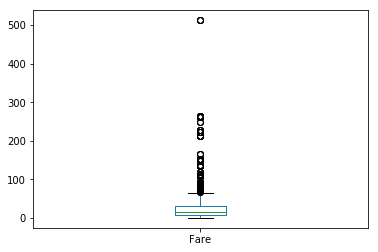

In [119]:
%matplotlib inline #use to render matplotlib plots within the notebook
#Create box plot to show distn of Fare data
df.Fare.plot(kind='box')

In [120]:
#Categorical Variables:
#For gender:
df.describe(include = 'all')

Age        Cabin Embarked         Fare              Name  \
count   1046.000000          295     1307  1308.000000              1309   
unique          NaN          186        3          NaN              1307   
top             NaN  C23 C25 C27        S          NaN  Kelly, Mr. James   
freq            NaN            6      914          NaN                 2   
mean      29.881138          NaN      NaN    33.295479               NaN   
std       14.413493          NaN      NaN    51.758668               NaN   
min        0.170000          NaN      NaN     0.000000               NaN   
25%       21.000000          NaN      NaN     7.895800               NaN   
50%       28.000000          NaN      NaN    14.454200               NaN   
75%       39.000000          NaN      NaN    31.275000               NaN   
max       80.000000          NaN      NaN   512.329200               NaN   

              Parch       Pclass   Sex        SibSp     Survived    Ticket  
count   1309.000000  1309.000000  1309  1309.000000  1309.000000      1309  
unique          NaN          NaN     2          NaN          NaN       929  
top             NaN          NaN  male          NaN          NaN  CA. 2343  
freq            NaN          NaN   843          NaN          NaN        11  
mean       0.385027     2.294882   NaN     0.498854  -283.301757       NaN  
std        0.865560     0.837836   NaN     1.041658   414.337413       NaN  
min        0.000000     1.000000   NaN     0.000000  -888.000000       NaN  
25%        0.000000     2.000000   NaN     0.000000  -888.000000       NaN  
50%        0.000000     3.000000   NaN     0.000000     0.000000       NaN  
75%        0.000000     3.000000   NaN     1.000000     1.000000       NaN  
max        9.000000     3.000000   NaN     8.000000     1.000000       NaN

In [121]:
#Use value counts on categorical variables:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [123]:
#Use value counts on categorical variables as a % of total:
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [126]:
#Exclude the dummy value set for training data
df[df.Survived != -888].Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

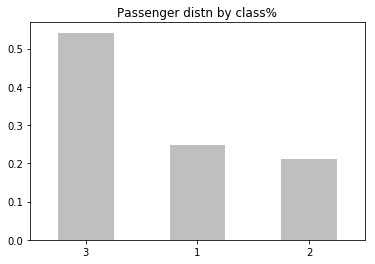

In [137]:
#Use value counts on categorical variables as a % of total:
#You can plot the output of these functions as you would any other DF

#NOTE: The semicolon at the end hides the matplotlib object information normally printed above the chart!

df.Pclass.value_counts(normalize=True).plot(kind = 'bar',rot = 0, 
                                            alpha = 0.5, color = 'grey', title = 'Passenger distn by class%');



### Plotting distributions in Pandas

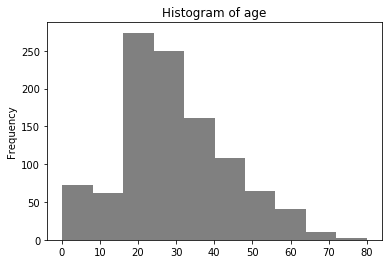

In [141]:
#Use the hist function to plot frequency of continueous data into buckets
df.Age.plot(kind='hist',title = 'Histogram of age', color = 'grey');

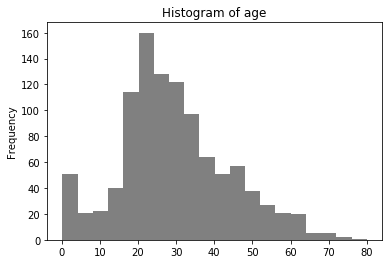

In [143]:
#If we want to specify the NUMBER OF bins:
df.Age.plot(kind='hist',title = 'Histogram of age', color = 'grey',bins=20);

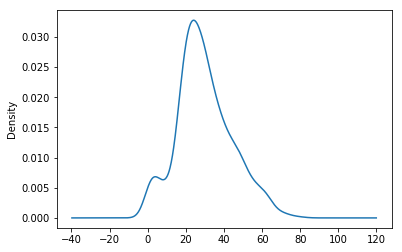

In [144]:
#Or plot KDE (Kernal Density Esimate) using pandas
df.Age.plot(kind='kde')

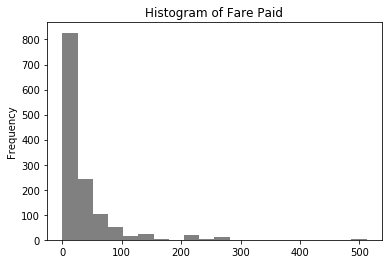

In [145]:
#Plot hist for the fare paid:
df.Fare.plot(kind='hist',title = 'Histogram of Fare Paid', color = 'grey',bins=20);
#We can see this is very skewed

In [147]:
#To compare skewness, use the .skew property for a given numerical feature:
print('Skewness of age {0}:'.format(df.Age.skew()))
print('Skewness of fare paid {0}:'.format(df.Fare.skew()))

Skewness of age 0.40767455974362266:
Skewness of fare paid 4.367709134122922:


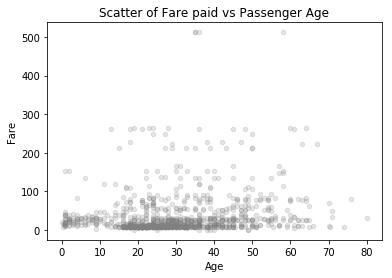

In [150]:
#Use a scatter plot to show distribution of 2 variables:
df.plot.scatter(x='Age',y='Fare',color='grey',title = 'Scatter of Fare paid vs Passenger Age',alpha = 0.2);

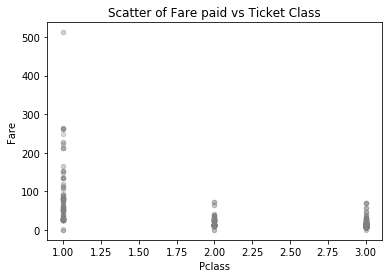

In [153]:
#Use a scatter plot to show distribution of 2 variables:
df.plot.scatter(x='Pclass',y='Fare',color='grey',title = 'Scatter of Fare paid vs Ticket Class',alpha = 0.1);

### Grouping and Aggregations:

In [157]:
#Group by Sex, then calculate the median Age (by sex)
#You can pass a list to group by multiple features
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [158]:
df.groupby('Pclass').Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [161]:
#Or, to output values for multiple columns, use a list to slice
df.groupby('Pclass')['Fare','Age'].median()

Fare   Age
Pclass               
1       60.0000  39.0
2       15.0458  29.0
3        8.0500  24.0

In [163]:
#Using the agg fuction:
#Pass as dictionary of different aggregations to the agg function:
df.groupby('Pclass').agg({'Fare':'mean','Age':'median'})

Fare   Age
Pclass                 
1       87.508992  39.0
2       21.179196  29.0
3       13.302889  24.0

In [165]:
#Or, for more complicated aggregations, create a dict:

aggregations = {
    
    'Fare': {
        'mean_fare':'mean',
        'median_fare':'median',
        'max_fare':max,
        'min_far':np.min
    },
    'Age': {
        'mean_age':'mean',
        'median_age':'median',
        'max_age':max,
        'min_age':min,
        'age_range': lambda x:max(x) - min(x)
    }
}

In [167]:
df.groupby('Pclass').agg(aggregations)

C:\Users\jaylward\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                      Age                     \
        mean_fare median_fare  max_fare min_far   mean_age median_age max_age   
Pclass                                                                          
1       87.508992     60.0000  512.3292     0.0  39.159930       39.0    80.0   
2       21.179196     15.0458   73.5000     0.0  29.506705       29.0    70.0   
3       13.302889      8.0500   69.5500     0.0  24.816367       24.0    74.0   

                          
       min_age age_range  
Pclass                    
1         0.92     79.08  
2         0.67     69.33  
3         0.17     73.83

In [169]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [171]:
#Using crosstabs like a (simple) pivot table, returns counts of records:

pd.crosstab(df.Sex,df.Pclass)

Pclass    1    2    3
Sex                  
female  144  106  216
male    179  171  493

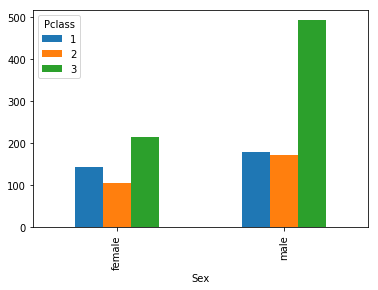

In [173]:
#Again, you can plot these as with any other df.

pd.crosstab(df.Sex,df.Pclass).plot(kind = 'bar');

In [175]:
#Using Pivot table allows more flexibility aggregating:
#Prefer Pivot tables to crosstabs

df.pivot_table(index='Sex',columns='Pclass',values='Age', aggfunc='mean')

Pclass          1          2          3
Sex                                    
female  37.037594  27.499223  22.185329
male    41.029272  30.815380  25.962264

In [180]:
#Using the groupby function:
#Passing a list of attributes by which to group

df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [181]:
#to convert this output into a tabular format, use unstack()

df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass          1          2          3
Sex                                    
female  37.037594  27.499223  22.185329
male    41.029272  30.815380  25.962264

# Data Munging:
Cleaning up data, dealing with null values, outliers etc

### 1) Null values:

In [186]:
#Review and correct columns with null values:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [187]:
#Embarked: 2 missing values:
df[df.Embarked.isnull() ==True]

Age Cabin Embarked  Fare  \
PassengerId                              
62           38.0   B28      NaN  80.0   
830          62.0   B28      NaN  80.0   

                                                  Name  Parch  Pclass     Sex  \
PassengerId                                                                     
62                                 Icard, Miss. Amelie      0       1  female   
830          Stone, Mrs. George Nelson (Martha Evelyn)      0       1  female   

             SibSp  Survived  Ticket  
PassengerId                           
62               0         1  113572  
830              0         1  113572

In [189]:
#Review value counts / distribution of embarkation:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [190]:
#Review survival data by point of embarkation in case of bias:
pd.crosstab(df.Embarked,df.Survived)

Survived  -888   0     1  
Embarked                  
C          102    75    93
Q           46    47    30
S          270   427   217

In [191]:
#Replace null values for Embarked
#Can use fillna() function or access the data using loc fucntion
#df.loc[df.Embarked.isnull(),'Embarked'] = 'S' #row, col

#df.Embarked.fillna('S',inplace=True)

PassengerId
62     NaN
830    NaN
Name: Embarked, dtype: object

In [192]:
#Option 2: Try to identify the missing data values based on the rest of the info in the record:
#Look at fare values by embarkation point and class - does this help us identify?

df.groupby(['Embarked','Pclass']).Fare.median()

Embarked  Pclass
C         1         76.7292
          2         15.3146
          3          7.8958
Q         1         90.0000
          2         12.3500
          3          7.7500
S         1         52.0000
          2         15.3750
          3          8.0500
Name: Fare, dtype: float64

In [195]:
#It looks like the embarkation point should be C, not Southhampton.

df.Embarked.fillna('C',inplace=True)

df[df.Embarked.isnull()]
#Nulls removed

Empty DataFrame
Columns: [Age, Cabin, Embarked, Fare, Name, Parch, Pclass, Sex, SibSp, Survived, Ticket]
Index: []

In [196]:
#Fare: 1 null record:
df[df.Fare.isnull()]

Age Cabin Embarked  Fare                Name  Parch  Pclass  \
PassengerId                                                                 
1044         60.5   NaN        S   NaN  Storey, Mr. Thomas      0       3   

              Sex  SibSp  Survived Ticket  
PassengerId                                
1044         male      0      -888   3701

In [200]:
#Calcualte the median fare for 3rd class embarked = 'S'
#We already have this above, but just shows an alternative method
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'),'Fare'].median()
median_fare

8.05

In [201]:
#Now replace the empty fare record
df.Fare.fillna(median_fare,inplace=True)

In [202]:
#Reivew the df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [206]:
#Set the maxrows to display: This is better than .head() as it shows the count of values
pd.options.display.max_rows = 15

#Age: Lots of null values:
df[df.Age.isnull()]

Age Cabin Embarked      Fare  \
PassengerId                                 
6            NaN   NaN        Q    8.4583   
18           NaN   NaN        S   13.0000   
20           NaN   NaN        C    7.2250   
27           NaN   NaN        C    7.2250   
29           NaN   NaN        Q    7.8792   
30           NaN   NaN        S    7.8958   
32           NaN   B78        C  146.5208   
...          ...   ...      ...       ...   
1274         NaN   NaN        S   14.5000   
1276         NaN   NaN        S   12.8750   
1300         NaN   NaN        Q    7.7208   
1302         NaN   NaN        Q    7.7500   
1305         NaN   NaN        S    8.0500   
1308         NaN   NaN        S    8.0500   
1309         NaN   NaN        C   22.3583   

                                                       Name  Parch  Pclass  \
PassengerId                                                                  
6                                          Moran, Mr. James      0       3   
18                             Williams, Mr. Charles Eugene      0       2   
20                                  Masselmani, Mrs. Fatima      0       3   
27                                  Emir, Mr. Farred Chehab      0       3   
29                            O'Dwyer, Miss. Ellen "Nellie"      0       3   
30                                      Todoroff, Mr. Lalio      0       3   
32           Spencer, Mrs. William Augustus (Marie Eugenie)      0       1   
...                                                     ...    ...     ...   
1274                             Risien, Mrs. Samuel (Emma)      0       3   
1276                         Wheeler, Mr. Edwin Frederick""      0       2   
1300                        Riordan, Miss. Johanna Hannah""      0       3   
1302                                 Naughton, Miss. Hannah      0       3   
1305                                     Spector, Mr. Woolf      0       3   
1308                                    Ware, Mr. Frederick      0       3   
1309                               Peter, Master. Michael J      1       3   

                Sex  SibSp  Survived         Ticket  
PassengerId                                          
6              male      0         0         330877  
18             male      0         1         244373  
20           female      0         1           2649  
27             male      0         0           2631  
29           female      0         1         330959  
30             male      0         0         349216  
32           female      1         1       PC 17569  
...             ...    ...       ...            ...  
1274         female      0      -888         364498  
1276           male      0      -888  SC/PARIS 2159  
1300         female      0      -888         334915  
1302         female      0      -888         365237  
1305           male      0      -888      A.5. 3236  
1308           male      0      -888         359309  
1309           male      1      -888           2668  

[263 rows x 11 columns]

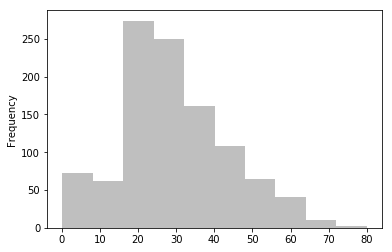

In [208]:
#Can replace all records with mean? What about skew?
df.Age.plot(kind = 'hist',color = 'grey', alpha = 0.5);

In [215]:
#Mean value is about 30
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

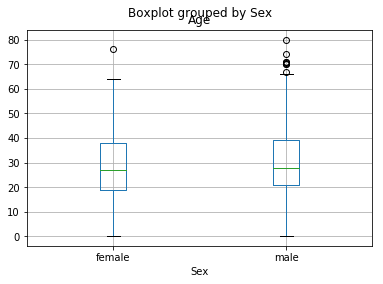

In [220]:
#Plot distn of age by gender:
#df[df.Age.isnull() ==False]

df[df.Age.notnull()].boxplot('Age','Sex');

#Distn is almost identical, doesn't really help us improve accuracy:

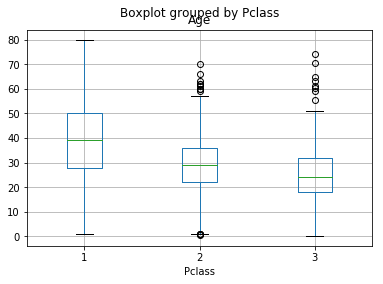

In [222]:
#What about Pclass? Age is correlated with class
#This is probably pretty good:

df[df.Age.notnull()].boxplot('Age','Pclass');

In [223]:
#What about passenger name, or specifically title?
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
                              ...                        
1303      Minahan, Mrs. William Edward (Lillian E Thorpe)
1304                       Henriksson, Miss. Jenny Lovisa
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [231]:
#Write a function to split out the title:

#The split function outputs a list
'Aylward, Master. Julian'.split(',')[1]    

def GetTitle(name):
    firstnamewithtitle = name.split(',')[1] #split passed variable using comma, access 2nd value
    title = firstnamewithtitle.split('.')[0] #first value from list spit by .
    title = title.strip().lower() #remove blanks and lowercase
    return title
    

#GetTitle('Aylward, Master. Julian')

'master'

In [232]:
#Using the pandas map function allows us to process all records i in a df (saves converting to a list)

df.Name.map(lambda x: GetTitle(x)) #Alternatively you can use df.Name.map(GetTitle)

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
6           mr
7           mr
         ...  
1303       mrs
1304      miss
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [233]:
#Review unique values:
df.Name.map(lambda x: GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [234]:
#These need tidying up a bit:
#Modify the function, pass titles to a dictionary that outputs the desired title:

def GetTitle2(name):
    title_group = {
    'mr': 'mr',
    'mrs': 'mrs',
    'miss': 'miss',
    'master': 'master',
    'don': 'sir',
    'rev': 'sir',
    'dr': 'sir',
    'mme': 'mrs',
    'ms': 'mrs',
    'major': 'sir',
    'lady': 'lady',
    'sir': 'sir',
    'mlle': 'miss',
    'col': 'sir',
    'capt': 'sir',
    'the countess': 'lady',
    'jonkheer': 'sir',
    'dona': 'lady'
    }
    firstnamewithtitle = name.split(',')[1] #split passed variable using comma, access 2nd value
    title = firstnamewithtitle.split('.')[0] #first value from list spit by .
    title = title.strip().lower() #remove blanks and lowercase
    return title_group[title]

In [236]:
#Now add title to the existing pandas df with the improved function:
df['Title'] = df.Name.map(lambda x : GetTitle2(x))

In [237]:
df.head()

Age Cabin Embarked     Fare  \
PassengerId                                 
1            22.0   NaN        S   7.2500   
2            38.0   C85        C  71.2833   
3            26.0   NaN        S   7.9250   
4            35.0  C123        S  53.1000   
5            35.0   NaN        S   8.0500   

                                                          Name  Parch  Pclass  \
PassengerId                                                                     
1                                      Braund, Mr. Owen Harris      0       3   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...      0       1   
3                                       Heikkinen, Miss. Laina      0       3   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)      0       1   
5                                     Allen, Mr. William Henry      0       3   

                Sex  SibSp  Survived            Ticket Title  
PassengerId                                                   
1              male      1         0         A/5 21171    mr  
2            female      1         1          PC 17599   mrs  
3            female      0         1  STON/O2. 3101282  miss  
4            female      1         1            113803   mrs  
5              male      0         0            373450    mr

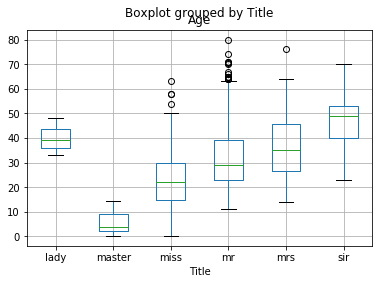

In [241]:
#Now plot the distn of age by title:

df[df.Age.notnull()].boxplot('Age','Title');

In [245]:
#Now replace missing age values using median age by Title as it looks like a good predictor of age:

title_age_median = df.groupby('Title').Age.transform('median') 
title_age_median

PassengerId
1       29.0
2       35.0
3       22.0
4       35.0
5       29.0
6       29.0
7       29.0
        ... 
1303    35.0
1304    22.0
1305    29.0
1306    39.0
1307    29.0
1308    29.0
1309     4.0
Name: Age, Length: 1309, dtype: float64

In [246]:
#Now replace missing values with medians by Title:

df.Age.fillna(title_age_median,inplace=True)

In [247]:
#Too few complete records for Cabin field:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


### 2) Outliers:

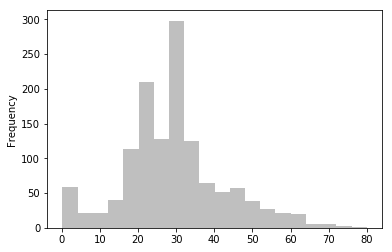

In [251]:
#Lets look at AGE:

df.Age.plot(kind='hist', bins = 20, color='grey',alpha=0.5);

In [253]:
#What about passengers over 70?
df.loc[df.Age >= 70]

Age Cabin Embarked     Fare  \
PassengerId                                 
97           71.0    A5        C  34.6542   
117          70.5   NaN        Q   7.7500   
494          71.0   NaN        C  49.5042   
631          80.0   A23        S  30.0000   
673          70.0   NaN        S  10.5000   
746          70.0   B22        S  71.0000   
852          74.0   NaN        S   7.7750   
988          76.0   C46        S  78.8500   

                                                          Name  Parch  Pclass  \
PassengerId                                                                     
97                                   Goldschmidt, Mr. George B      0       1   
117                                       Connors, Mr. Patrick      0       3   
494                                    Artagaveytia, Mr. Ramon      0       1   
631                       Barkworth, Mr. Algernon Henry Wilson      0       1   
673                                Mitchell, Mr. Henry Michael      0       2   
746                               Crosby, Capt. Edward Gifford      1       1   
852                                        Svensson, Mr. Johan      0       3   
988          Cavendish, Mrs. Tyrell William (Julia Florence...      0       1   

                Sex  SibSp  Survived      Ticket Title  
PassengerId                                             
97             male      0         0    PC 17754    mr  
117            male      0         0      370369    mr  
494            male      0         0    PC 17609    mr  
631            male      0         1       27042    mr  
673            male      0         0  C.A. 24580    mr  
746            male      1         0   WE/P 5735   sir  
852            male      0         0      347060    mr  
988          female      1      -888       19877   mrs

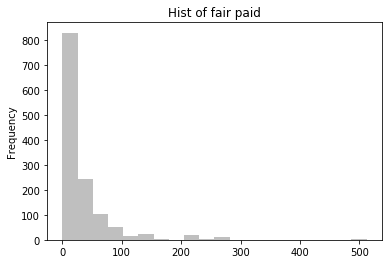

In [257]:
#Plot distn of fares:
df.Fare.plot(kind='hist',bins=20,color='grey',alpha=0.5, title = "Hist of fair paid");

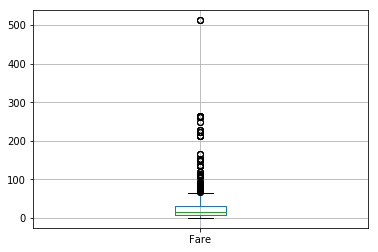

In [259]:
#And plot with boxplot:
df.boxplot('Fare');
#df.Fare.plot(kind='box') #same result

In [261]:
#Lets look at the most expensive tickets (max)
#All have the same ticket number.

df.loc[df.Fare == df.Fare.max()]

Age        Cabin Embarked      Fare  \
PassengerId                                         
259          35.0          NaN        C  512.3292   
680          36.0  B51 B53 B55        C  512.3292   
738          35.0         B101        C  512.3292   
1235         58.0  B51 B53 B55        C  512.3292   

                                                          Name  Parch  Pclass  \
PassengerId                                                                     
259                                           Ward, Miss. Anna      0       1   
680                         Cardeza, Mr. Thomas Drake Martinez      1       1   
738                                     Lesurer, Mr. Gustave J      0       1   
1235         Cardeza, Mrs. James Warburton Martinez (Charlo...      1       1   

                Sex  SibSp  Survived    Ticket Title  
PassengerId                                           
259          female      0         1  PC 17755  miss  
680            male      0         1  PC 17755    mr  
738            male      0         1  PC 17755    mr  
1235         female      0      -888  PC 17755   mrs

In [265]:
#Transform the Fare data to reduce the skewness and distribution:

log_fare = np.log(df.Fare + 1) #Add 1 to avoid log(0)
#type(log_fare)
log_fare

PassengerId
1       2.110213
2       4.280593
3       2.188856
4       3.990834
5       2.202765
6       2.246893
7       3.967694
          ...   
1303    4.510860
1304    2.171907
1305    2.202765
1306    4.699571
1307    2.110213
1308    2.202765
1309    3.150952
Name: Fare, Length: 1309, dtype: float64

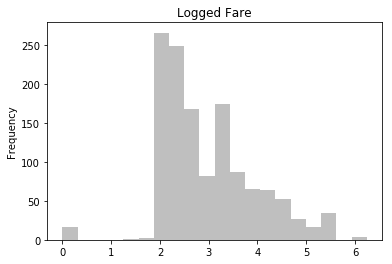

In [267]:
log_fare.plot(kind='hist',bins=20,title='Logged Fare',color='grey',alpha=0.5);

In [268]:
#binning, use cut or qcut (quantile based binning)

pd.qcut(df.Fare,4) #4 bins for fares

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
6         (7.896, 14.454]
7       (31.275, 512.329]
              ...        
1303    (31.275, 512.329]
1304      (-0.001, 7.896]
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [269]:
#Add label names for the bins:

pd.qcut(df.Fare,4,labels= ['low','medium','high','very high'])

PassengerId
1             low
2       very high
3          medium
4       very high
5          medium
6          medium
7       very high
          ...    
1303    very high
1304          low
1305       medium
1306    very high
1307          low
1308       medium
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [low < medium < high < very high]

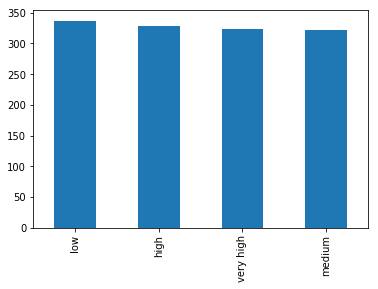

In [273]:
#Plot the distribution of records across the bins

pd.qcut(df.Fare,4,labels= ['low','medium','high','very high']).value_counts().plot(kind = 'bar')

In [275]:
df['fare_bin'] = pd.qcut(df.Fare,4,labels= ['low','medium','high','very high'])
df.head()

Age Cabin Embarked     Fare  \
PassengerId                                 
1            22.0   NaN        S   7.2500   
2            38.0   C85        C  71.2833   
3            26.0   NaN        S   7.9250   
4            35.0  C123        S  53.1000   
5            35.0   NaN        S   8.0500   

                                                          Name  Parch  Pclass  \
PassengerId                                                                     
1                                      Braund, Mr. Owen Harris      0       3   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...      0       1   
3                                       Heikkinen, Miss. Laina      0       3   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)      0       1   
5                                     Allen, Mr. William Henry      0       3   

                Sex  SibSp  Survived            Ticket Title   fare_bin  
PassengerId                                                              
1              male      1         0         A/5 21171    mr        low  
2            female      1         1          PC 17599   mrs  very high  
3            female      0         1  STON/O2. 3101282  miss     medium  
4            female      1         1            113803   mrs  very high  
5              male      0         0            373450    mr     medium

### Feature Engineering:
In addition to new features already created (fare bin, title), create appropriate fields required for modeling.
e.g. convert continuous data to categorical/discrete variables etc.

In [278]:
#Age State (Adult or Child)
#Use numpy.where

df['age_state'] = np.where(df['Age'] >= 18, 'Adult','Child')

df.age_state.value_counts()

Adult    1147
Child     162
Name: age_state, dtype: int64

In [295]:
#Did children have a higher chance of survival? Yes
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].age_state)

age_state  Adult  Child
Survived               
0            495     54
1            279     63

In [297]:
#Calculate Family Size, using Parent and sibling fields:

df['family_size'] = df.Parch + df.SibSp + 1 #+1 includes ticket holder themselves
df.head()

Age Cabin Embarked     Fare  \
PassengerId                                 
1            22.0   NaN        S   7.2500   
2            38.0   C85        C  71.2833   
3            26.0   NaN        S   7.9250   
4            35.0  C123        S  53.1000   
5            35.0   NaN        S   8.0500   

                                                          Name  Parch  Pclass  \
PassengerId                                                                     
1                                      Braund, Mr. Owen Harris      0       3   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...      0       1   
3                                       Heikkinen, Miss. Laina      0       3   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)      0       1   
5                                     Allen, Mr. William Henry      0       3   

                Sex  SibSp  Survived            Ticket Title   fare_bin  \
PassengerId                                                               
1              male      1         0         A/5 21171    mr        low   
2            female      1         1          PC 17599   mrs  very high   
3            female      0         1  STON/O2. 3101282  miss     medium   
4            female      1         1            113803   mrs  very high   
5              male      0         0            373450    mr     medium   

            age_state  family_size  
PassengerId                         
1               Adult            2  
2               Adult            2  
3               Adult            1  
4               Adult            2  
5               Adult            1

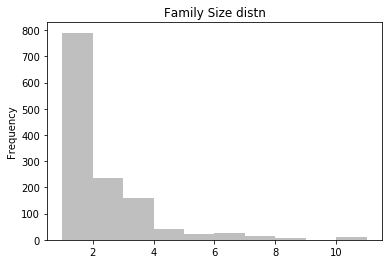

In [298]:
df['family_size'].plot(kind='hist',title='Family Size distn', color = 'grey', alpha = 0.5)

In [303]:
#Check out the biggest family size records
df.loc[df.family_size == df.family_size.max(),]

Age Cabin Embarked   Fare                               Name  \
PassengerId                                                                  
160           4.0   NaN        S  69.55         Sage, Master. Thomas Henry   
181          22.0   NaN        S  69.55       Sage, Miss. Constance Gladys   
202          29.0   NaN        S  69.55                Sage, Mr. Frederick   
325          29.0   NaN        S  69.55           Sage, Mr. George John Jr   
793          22.0   NaN        S  69.55            Sage, Miss. Stella Anna   
847          29.0   NaN        S  69.55           Sage, Mr. Douglas Bullen   
864          22.0   NaN        S  69.55  Sage, Miss. Dorothy Edith "Dolly"   
1080         22.0   NaN        S  69.55                    Sage, Miss. Ada   
1234         29.0   NaN        S  69.55              Sage, Mr. John George   
1252         14.5   NaN        S  69.55        Sage, Master. William Henry   
1257         35.0   NaN        S  69.55     Sage, Mrs. John (Annie Bullen)   

             Parch  Pclass     Sex  SibSp  Survived    Ticket   Title  \
PassengerId                                                             
160              2       3    male      8         0  CA. 2343  master   
181              2       3  female      8         0  CA. 2343    miss   
202              2       3    male      8         0  CA. 2343      mr   
325              2       3    male      8         0  CA. 2343      mr   
793              2       3  female      8         0  CA. 2343    miss   
847              2       3    male      8         0  CA. 2343      mr   
864              2       3  female      8         0  CA. 2343    miss   
1080             2       3  female      8      -888  CA. 2343    miss   
1234             9       3    male      1      -888  CA. 2343      mr   
1252             2       3    male      8      -888  CA. 2343  master   
1257             9       3  female      1      -888  CA. 2343     mrs   

              fare_bin age_state  family_size  
PassengerId                                    
160          very high     Child           11  
181          very high     Adult           11  
202          very high     Adult           11  
325          very high     Adult           11  
793          very high     Adult           11  
847          very high     Adult           11  
864          very high     Adult           11  
1080         very high     Adult           11  
1234         very high     Adult           11  
1252         very high     Child           11  
1257         very high     Adult           11

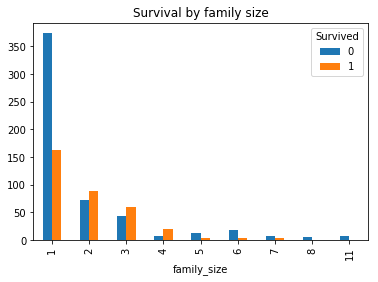

In [316]:
#Crosstab and plot survival rate vs family size

pd.crosstab(df[df.Survived != -888].family_size,df[df.Survived != -888].Survived).plot(
    kind='bar', title = 'Survival by family size');

In [318]:
#Create is_mother field - did mothers with children have a higher chance of surviving?
df['is_mother'] = np.where((df.Sex=='female') & (df.Age >=18) & (df.Parch >0) & (df.Title != 'miss'),1,0 )
df[(df.is_mother ==1) & (df.Survived != -888)]

Age Cabin Embarked      Fare  \
PassengerId                                  
9            27.0   NaN        S   11.1333   
26           38.0   NaN        S   31.3875   
99           34.0   NaN        S   23.0000   
141          35.0   NaN        C   15.2458   
167          35.0   E33        S   55.0000   
168          45.0   NaN        S   27.9000   
248          24.0   NaN        S   14.5000   
...           ...   ...      ...       ...   
856          18.0   NaN        S    9.3500   
857          45.0   NaN        S  164.8667   
859          24.0   NaN        C   19.2583   
872          47.0   D35        S   52.5542   
880          56.0   C50        C   83.1583   
881          25.0   NaN        S   26.0000   
886          39.0   NaN        Q   29.1250   

                                                          Name  Parch  Pclass  \
PassengerId                                                                     
9            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      2       3   
26           Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...      5       3   
99                        Doling, Mrs. John T (Ada Julia Bone)      1       2   
141                              Boulos, Mrs. Joseph (Sultana)      2       3   
167                     Chibnall, Mrs. (Edith Martha Bowerman)      1       1   
168            Skoog, Mrs. William (Anna Bernhardina Karlsson)      4       3   
248                            Hamalainen, Mrs. William (Anna)      2       2   
...                                                        ...    ...     ...   
856                                 Aks, Mrs. Sam (Leah Rosen)      1       3   
857                 Wick, Mrs. George Dennick (Mary Hitchcock)      1       1   
859                      Baclini, Mrs. Solomon (Latifa Qurban)      3       3   
872           Beckwith, Mrs. Richard Leonard (Sallie Monypeny)      1       1   
880              Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)      1       1   
881               Shelley, Mrs. William (Imanita Parrish Hall)      1       2   
886                       Rice, Mrs. William (Margaret Norton)      5       3   

                Sex  SibSp  Survived  Ticket Title   fare_bin age_state  \
PassengerId                                                               
9            female      0         1  347742   mrs     medium     Adult   
26           female      1         1  347077   mrs  very high     Adult   
99           female      0         1  231919   mrs       high     Adult   
141          female      0         0    2678   mrs       high     Adult   
167          female      0         1  113505   mrs  very high     Adult   
168          female      1         0  347088   mrs       high     Adult   
248          female      0         1  250649   mrs       high     Adult   
...             ...    ...       ...     ...   ...        ...       ...   
856          female      0         1  392091   mrs     medium     Adult   
857          female      1         1   36928   mrs  very high     Adult   
859          female      0         1    2666   mrs       high     Adult   
872          female      1         1   11751   mrs  very high     Adult   
880          female      0         1   11767   mrs  very high     Adult   
881          female      0         1  230433   mrs       high     Adult   
886          female      0         0  382652   mrs       high     Adult   

             family_size  is_mother  
PassengerId                          
9                      3          1  
26                     7          1  
99                     2          1  
141                    3          1  
167                    2          1  
168                    6          1  
248                    3          1  
...                  ...        ...  
856                    2          1  
857                    3          1  
859                    4          1  
872                    3          1  
880                    2          1  
881    

In [320]:
#Crosstab is_mother:
pd.crosstab(df[df.Survived != -888].is_mother,df[df.Survived != -888].Survived)

Survived     0    1
is_mother          
0          533  302
1           16   40

In [322]:
#Deck: from the cabin attr, what level were they on?
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [325]:
#Assume cabin value T is an error, set to null
df.loc[df.Cabin =='T','Cabin'] = np.NaN 

In [329]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [334]:
#Extract the deck from cabin:
#Using map function and lambda to process all records in df

def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')

df['Deck'] = df.Cabin.map(lambda x : get_deck(x))

df.head()

Age Cabin Embarked     Fare  \
PassengerId                                 
1            22.0   NaN        S   7.2500   
2            38.0   C85        C  71.2833   
3            26.0   NaN        S   7.9250   
4            35.0  C123        S  53.1000   
5            35.0   NaN        S   8.0500   

                                                          Name  Parch  Pclass  \
PassengerId                                                                     
1                                      Braund, Mr. Owen Harris      0       3   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...      0       1   
3                                       Heikkinen, Miss. Laina      0       3   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)      0       1   
5                                     Allen, Mr. William Henry      0       3   

                Sex  SibSp  Survived            Ticket Title   fare_bin  \
PassengerId                                                               
1              male      1         0         A/5 21171    mr        low   
2            female      1         1          PC 17599   mrs  very high   
3            female      0         1  STON/O2. 3101282  miss     medium   
4            female      1         1            113803   mrs  very high   
5              male      0         0            373450    mr     medium   

            age_state  family_size  is_mother Deck  
PassengerId                                         
1               Adult            2          0    Z  
2               Adult            2          0    C  
3               Adult            1          0    Z  
4               Adult            2          0    C  
5               Adult            1          0    Z

In [335]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [336]:
pd.crosstab(df.Deck,df.Survived)

Survived  -888   0     1  
Deck                      
A            7     8     7
B           18    12    35
C           35    24    35
D           13     8    25
E            9     8    24
F            8     5     8
G            1     2     2
Z          327   482   206

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age            1309 non-null float64
Cabin          294 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
Title          1309 non-null object
fare_bin       1309 non-null category
age_state      1309 non-null object
family_size    1309 non-null int64
is_mother      1309 non-null int32
Deck           1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 210.2+ KB


### Categorical Feature Encoding:

In [345]:
#Convert Sex into binary feature
df['is_male'] = np.where(df.Sex=='male',1,0)

In [346]:
#Use the get_dummies to convert a list of categorical features
#Deck, PClass, age_state, Title, fare_bin, Embarked

df = pd.get_dummies(df,columns=['Deck','Pclass','age_state','Title','fare_bin','Embarked'])

In [391]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 32 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
family_size           1309 non-null int64
is_mother             1309 non-null int32
is_male               1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
age_state_Adult       1309 non-null uint8
age_state_Child       1309 non-null uint8
Title_lady            1309 non-null uint8
Title_master          1309 non-null uint8
Title_m

### Drop columns and reorder

In [348]:
#Drop columns not required for the modelling
#Using pandas drop function

df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis = 1,inplace=True) #Axis 1 refers to columns


In [353]:
#Reorder columns by iterating through columns in the DF
type(df.columns)
df.columns

Index(['Age', 'Fare', 'Survived', 'family_size', 'is_mother', 'is_male',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_Z', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'age_state_Adult',
       'age_state_Child', 'Title_lady', 'Title_master', 'Title_miss',
       'Title_mr', 'Title_mrs', 'Title_sir', 'fare_bin_low', 'fare_bin_medium',
       'fare_bin_high', 'fare_bin_very high', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [359]:
#iterate through list
columns = [col for col in df.columns if col != 'Survived'] #col is a variable (e.g. for list_obj in list:)
columns = ['Survived'] + columns
columns

['Survived',
 'Age',
 'Fare',
 'family_size',
 'is_mother',
 'is_male',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_Z',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'age_state_Adult',
 'age_state_Child',
 'Title_lady',
 'Title_master',
 'Title_miss',
 'Title_mr',
 'Title_mrs',
 'Title_sir',
 'fare_bin_low',
 'fare_bin_medium',
 'fare_bin_high',
 'fare_bin_very high',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [360]:
# use ordered list to "reselect" columns from the DF, outputting to the DF
df = df[columns] 

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 32 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
family_size           1309 non-null int64
is_mother             1309 non-null int32
is_male               1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
age_state_Adult       1309 non-null uint8
age_state_Child       1309 non-null uint8
Title_lady            1309 non-null uint8
Title_master          1309 non-null uint8
Title_m

## Write processed file and save:

In [370]:
processed_data_path = os.path.join(os.path.pardir,'data','processed')
write_train_path = os.path.join(processed_data_path,'train.csv')
write_test_path = os.path.join(processed_data_path,'test.csv')

In [375]:
#Train data
df.loc[df.Survived != -888].to_csv(write_train_path) #exclude test data where survived = default value

#Test data
columns = [col for col in df.columns if col != 'Survived'] #use list comprehension to exclude Survived from test data
df.loc[df.Survived ==-888,columns].to_csv(write_test_path)

## Build reproducible script to output data

In [376]:
get_processed_data_script_file = os.path.join(os.path.pardir,'src','data','get_processed_data.py')

In [398]:
%%writefile $get_processed_data_script_file
import pandas as pd
import numpy as np
import os

def read_data():
    #Set path of data:
    raw_data_path = os.path.join(os.path.pardir,'data','raw')
    train_file_path = os.path.join(raw_data_path,'train.csv')
    test_file_path = os.path.join(raw_data_path,'test.csv')
    #Read the data with default paramaters
    train_df = pd.read_csv(train_file_path, index_col = 'PassengerId')
    test_df = pd.read_csv(test_file_path, index_col = 'PassengerId')
    #Set default value for test dataset Survived
    test_df["Survived"] = -888
    df = pd.concat((train_df,test_df), axis = 0, sort = True)
    return df

# Process_data function pulls in other functions to transform the dataset
def process_data(df):
    #Using the method chaining concept:
    return (df
           #Create Title Attr and add this
            .assign(Title = lambda x : x.Name.map(GetTitle2))
            #Call an external function using .pipe
            .pipe(fill_missing_values)
            #Create fare_bin feature
            .assign(fare_bin = lambda x :pd.qcut(x.Fare,4,labels= ['low','medium','high','very high']))
            #create age_state feature
            .assign(age_state = lambda x: np.where(x['Age'] >= 18, 'Adult','Child'))
            #Family Size
            .assign(family_size = lambda x: x.Parch + x.SibSp + 1) #+1 includes ticket holder themselves)
            #is_mother
            .assign(is_mother = lambda x: np.where((x.Sex=='female') & (x.Age >=18) & (x.Parch >0) & (x.Title != 'miss'),1,0 ))
            #Create deck features
            .assign(Cabin = lambda x: np.where(x.Cabin=='T',np.NaN, x.Cabin))
            .assign(Deck = lambda x: x.Cabin.map(get_deck))
            #Feature encoding:
            .assign(is_male = lambda x : np.where(x.Sex =='male',1,0))
            .pipe(pd.get_dummies,columns=['Deck','Pclass','age_state','Title','fare_bin','Embarked']) #note diff here vs above
            .drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'],axis = 1) #Axis 1 refers to columns)
            #reorder cols
            .pipe(reorder_columns)
           )


def GetTitle2(name):
    title_group = {
    'mr': 'mr',
    'mrs': 'mrs',
    'miss': 'miss',
    'master': 'master',
    'don': 'sir',
    'rev': 'sir',
    'dr': 'sir',
    'mme': 'mrs',
    'ms': 'mrs',
    'major': 'sir',
    'lady': 'lady',
    'sir': 'sir',
    'mlle': 'miss',
    'col': 'sir',
    'capt': 'sir',
    'the countess': 'lady',
    'jonkheer': 'sir',
    'dona': 'lady'
    }
    firstnamewithtitle = name.split(',')[1] #split passed variable using comma, access 2nd value
    title = firstnamewithtitle.split('.')[0] #first value from list spit by .
    title = title.strip().lower() #remove blanks and lowercase
    return title_group[title]


def fill_missing_values(df):
    #Fill null embarked
    df.Embarked.fillna('C',inplace=True)
    #Calcualte and fill null median fare
    median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'),'Fare'].median()
    df.Fare.fillna(median_fare,inplace=True)
    #Age
    title_age_median = df.groupby('Title').Age.transform('median') 
    df.Age.fillna(title_age_median,inplace=True)
    return df


def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
    
def reorder_columns(df):
    columns = [col for col in df.columns if col != 'Survived'] #col is a variable (e.g. for list_obj in list:)
    columns = ['Survived'] + columns
    df = df[columns]
    return df

def write_data(df):
    #Create file paths:
    processed_data_path = os.path.join(os.path.pardir,'data','processed')
    write_train_path = os.path.join(processed_data_path,'train.csv')
    write_test_path = os.path.join(processed_data_path,'test.csv')
    #wite data to file
    df.loc[df.Survived != -888].to_csv(write_train_path) #exclude test data where survived = default value
    columns = [col for col in df.columns if col != 'Survived'] #use list comprehension to exclude Survived from test data
    df.loc[df.Survived ==-888,columns].to_csv(write_test_path)


#Call the functions
if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)


Overwriting ..\src\data\get_processed_data.py


In [399]:
#Execute the script
!python $get_processed_data_script_file

In [402]:
#Load processed train data:
train_df = pd.read_csv(write_train_path)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 33 columns):
PassengerId           891 non-null int64
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
family_size           891 non-null int64
is_mother             891 non-null int64
is_male               891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_Z                891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
age_state_Adult       891 non-null int64
age_state_Child       891 non-null int64
Title_lady            891 non-null int64
Title_master          891 non-

In [403]:
#Load processed test data:
test_df = pd.read_csv(write_test_path)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 32 columns):
PassengerId           418 non-null int64
Age                   418 non-null float64
Fare                  418 non-null float64
family_size           418 non-null int64
is_mother             418 non-null int64
is_male               418 non-null int64
Deck_A                418 non-null int64
Deck_B                418 non-null int64
Deck_C                418 non-null int64
Deck_D                418 non-null int64
Deck_E                418 non-null int64
Deck_F                418 non-null int64
Deck_G                418 non-null int64
Deck_Z                418 non-null int64
Pclass_1              418 non-null int64
Pclass_2              418 non-null int64
Pclass_3              418 non-null int64
age_state_Adult       418 non-null int64
age_state_Child       418 non-null int64
Title_lady            418 non-null int64
Title_master          418 non-null int64
Title_miss            418 non-